### 지도 학습과 비지도 학습
* supervised learning, unsupervised learning
* 비지도 학습: 데이터의 라벨 없이 학습하는거(response/dependent variable X 없음)   
데이터셋을 이해하기 위한 정보 추출   
변수들이 가지는 관계 분석   


1. reduce the dimension. 데이터의 차원 감소. 차원이 감소된 데이터를 학습용 데이터로 사용할 수 있음   
변수들 간 함의를 담은 소수의 변수를 사용하는 것이 더 도움이 될 수도 있음   
어떤 변수들이 주요하고. 변수 통합 시 어떤 의미를 가지는지 새로 해석할 수 있음(교재. 289~291)

2. Clustering. 군집화   
유사한 데이터끼리 묶어 의미있는 그룹을 만드는 거   
그룹 내 유사점과 각 그룹을 구분하는 기준은 어떤지 확인할 수 있음

## PCA(; Principal Components Analysis)
* 고차원의 데이터를 저차원의 데이터로 환원시키는 방법(numeric 데이터에서만 가능, categorical x)
* multiple numeric predictor variable들을 조합하여 비교적 적은 개수의 주요한 변수(principal component)들의 조합으로 만드는 것
* 기존의 전체 독립변수들의 변동성(variability)을 얼마나 잘 설명할 수 있는가를 기준으로, principal component의 중요성을 평가함
* principal component는 기존 변수들의 weighted linear combination이며. 이때 각 변수들의 계수(weight)를 통해 주성분에 대한 변수의 기여도를 확인할 수 있음   
변수들이 만드는 공분산 행렬(covariance matrix)의 고유값(eigen value)과 고유벡터(eigen vector)를 통해 설명도와 계수를 계산함
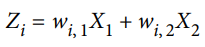
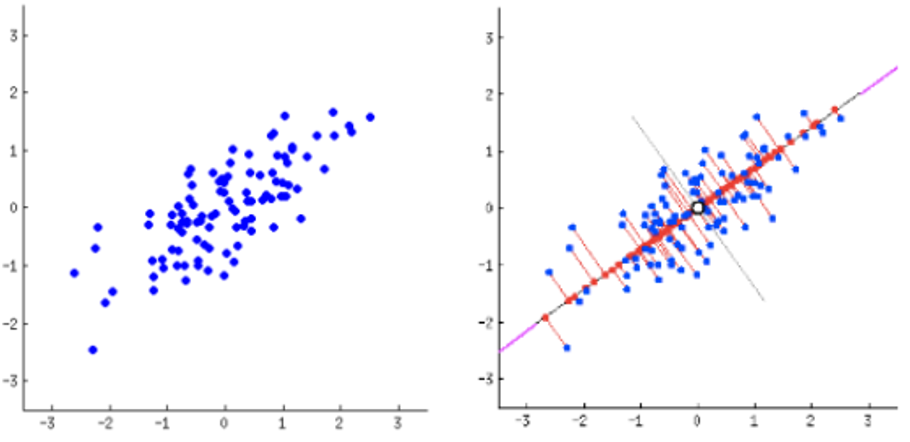

### 주성분 개수 결정
* 기존 변수들의 분산에 대해, 주성분이 설명할 수 있는 비율(cumulative variance)이 threshold(80% 등)를 넘을 때
* 주성분의 설명도를 나타내는 scree plot을 그려 의미있어보이는 주성분만 사용


#### correnpondence analysis(교재, 292)
* 범주형 자료형 사이의 관계를 분석하는 방법
* 차원 스케일링을 위해 행렬 대수를 사용한다는 점에서 PCA와 공통점을 가짐
* 주로 저차원 카테고리 데이터의 시각화를 위해 사용   
PCA처럼 빅데이터 분석을 위한 변수 차원 축소용으로는 사용하지 않음
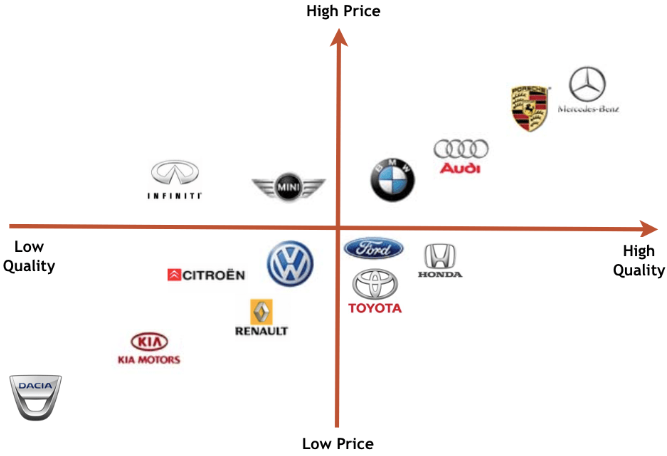

In [ ]:
# PCA 모델 사용 및 시각화

In [22]:
import pandas as pd

In [23]:
# 데이터 읽기
iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [26]:
from sklearn.preprocessing import StandardScaler

In [30]:
# 전처리. 변수 값의 크기의 설명력에 영향을 미치는 것을 막기 위해 사용
columns = list(iris.columns)
x_iris = iris[columns[:-1]]
y_iris = iris[columns[-1]]

sc_iris = StandardScaler()
x_iris_sc = sc_iris.fit_transform(x_iris)
x_iris_sc[:5, :]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [31]:
from sklearn.decomposition import PCA

In [32]:
# 주성분 분석
pca = PCA(n_components=4)
pca.fit(x_iris_sc)

PCA(n_components=4)

In [34]:
# 기존 데이터셋이 주성분으로는 어떻게 표현되는지 확인
p_component = pca.transform(x_iris_sc)
pd.DataFrame(data = p_component).head()

,0,1,2,3
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


In [36]:
# 주성분이, 기존 변수들로 어떻게 표현되는지 확인
pd.DataFrame(pca.components_, columns=columns[:-1])
# 1 주성분 = 0.521 X1 - 0.269 X2 + 0.58 X3 + 0.56 X4

,sepal.length,sepal.width,petal.length,petal.width
0,0.521066,-0.269347,0.580413,0.564857
1,0.377418,0.923296,0.024492,0.066942
2,-0.719566,0.244382,0.142126,0.634273
3,-0.261286,0.123510,0.801449,-0.523597


In [55]:
# 공분산과 고유벡터, 고유값으로 PCA 인자 확인하기
covariance_matrix = np.cov([x_iris_sc[:, 0], x_iris_sc[:, 1], x_iris_sc[:, 2], x_iris_sc[:, 3]])
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [57]:
value, vector = np.linalg.eig(covariance_matrix)

In [58]:
value[0] / sum(value)

0.7296244541329988

In [47]:
loading = pd.DataFrame(pca.components_, columns=columns[:-1])

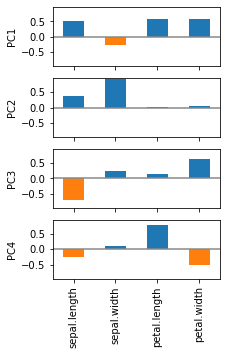

In [54]:
maxPC = 1.05 * np.max(np.abs(loading.values))
fig, axes = plt.subplots(4, 1, figsize=(3, 5), sharex=True)
for i, ax in enumerate(axes):
    pc_loading = loading.iloc[i]
    colors = ['C0' if j > 0 else 'C1' for j in pc_loading]
    ax.axhline(color='#888888')
    pc_loading.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)

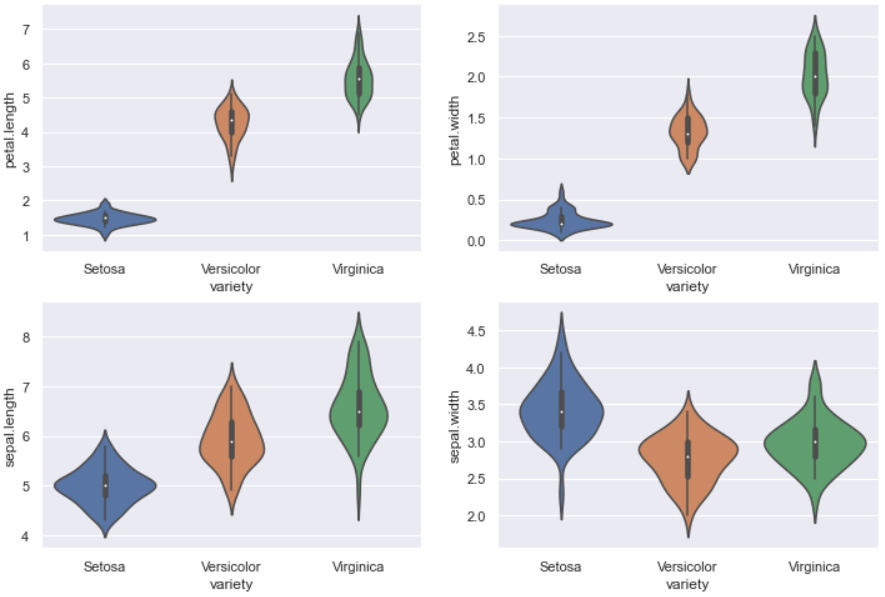

In [38]:
# 주성분 개수 선택
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [39]:
import numpy as np

In [41]:
import matplotlib.pyplot as plt

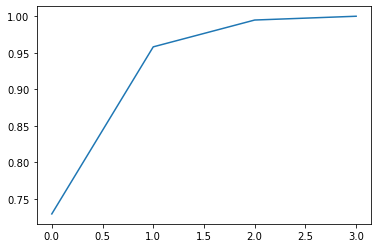

In [42]:
pd.Series(np.cumsum(pca.explained_variance_ratio_)).plot()
plt.show()

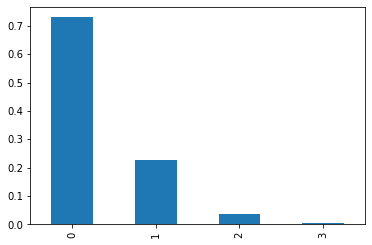

In [46]:
pd.DataFrame(data=pca.explained_variance_ratio_).plot.bar(legend=False)
plt.show()

In [61]:
pca_df = pd.DataFrame(data = p_component)
pca_df['variety'] = iris['variety']
pca_df.head()

,0,1,2,3,variety
0,-2.264703,0.480027,-0.127706,-0.024168,Setosa
1,-2.080961,-0.674134,-0.234609,-0.103007,Setosa
2,-2.364229,-0.341908,0.044201,-0.028377,Setosa
3,-2.299384,-0.597395,0.091290,0.065956,Setosa
4,-2.389842,0.646835,0.015738,0.035923,Setosa


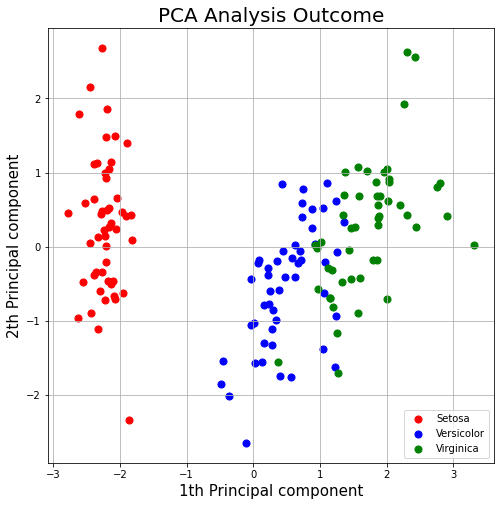

In [69]:
# 주성분 분석 결과 시각화

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.set_xlabel('1th Principal component', fontsize=15)
ax.set_ylabel('2th Principal component', fontsize=15)
ax.set_title('PCA Analysis Outcome', fontsize=20)

targets = iris[columns[-1]].unique()
colors = ['r', 'b', 'g']
for i, target in enumerate(targets):
    condi = pca_df['variety'] == target
    ax.scatter(pca_df[condi][0], pca_df[condi][1],
              c=colors[i], s=50)
ax.legend(targets)
ax.grid()
plt.show()

## K-Means Clustering
* clustering: 비슷한 성질을 가진 그룹들로 데이터를 분류하는 기술   
유의미한 데이터 그룹을 식별하는 것이 목표

* k-means: 대규모 데이터셋에서도 잘 동작하고, 단순한 알고리즘을 가지고 있어 초기 clustering method임에도 널리 사용되고 있음   
데이터의 within-cluster SS 전체 합이 최소가 되는 k개의 군집으로 나눔
* within-cluster SS: 어떤 군집을 구성하는 인스턴스와 군집 평균과의 거리의 제곱 합   
(거리 계산에 영향을 줄이기 위해 표준화 처리)
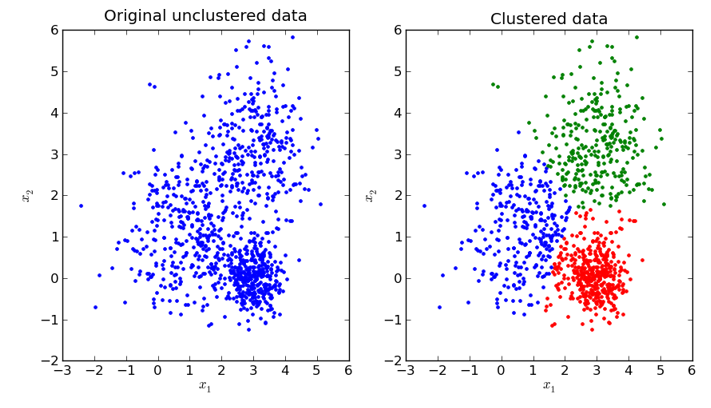

### k의 수 정하기
* 경험적 방법(rule of thumb): 데이터의 수가 n개라면 k = np.sqrt(n/2)로 설정
* Elbow method: k의 수를 하나씩 늘리면서 모니터링하여, 적절한 k의 수 결정 (주관적일 수 있음) 등

### k-means 알고리즘
1) k개의 데이터를 추출하여 각 클러스터 중심(centroid)으로 선택   
2) 각 인스턴스와 centroid를 사이 거리를 계산하여, 인스턴스를 가까운 클러스터에 할당   
3) 2에서 재할당된 클러스터를 기준으로 centroid 다시 계산   
4) 2~3을 클러스터에 데이터가 추가되지 않거나 centroid가 변화하지 않을 때까지 반복


sklearn에서 초기 k개의 centroid를 선택하는 방법
* k-means++(default): 데이터 연산을 통해, 학습 수렴을 빠르게 할 수 있는 초기 centroid k개 설정
* random: 데이터 중 랜덤으로 k개 선정
* 사용자 지정: 초기 centroid k개를 사용자가 지정함

In [ ]:
# k-means 모델 사용 및 시각화

In [71]:
# 데이터 전처리(스케일링)

purchase = pd.read_csv('purchase.csv')
x = purchase[['Age', 'EstimatedSalary']]

sc_purchase = StandardScaler()
x_sc = sc_purchase.fit_transform(x)

C:\Users\user\anaconda3\envs\env_temp\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


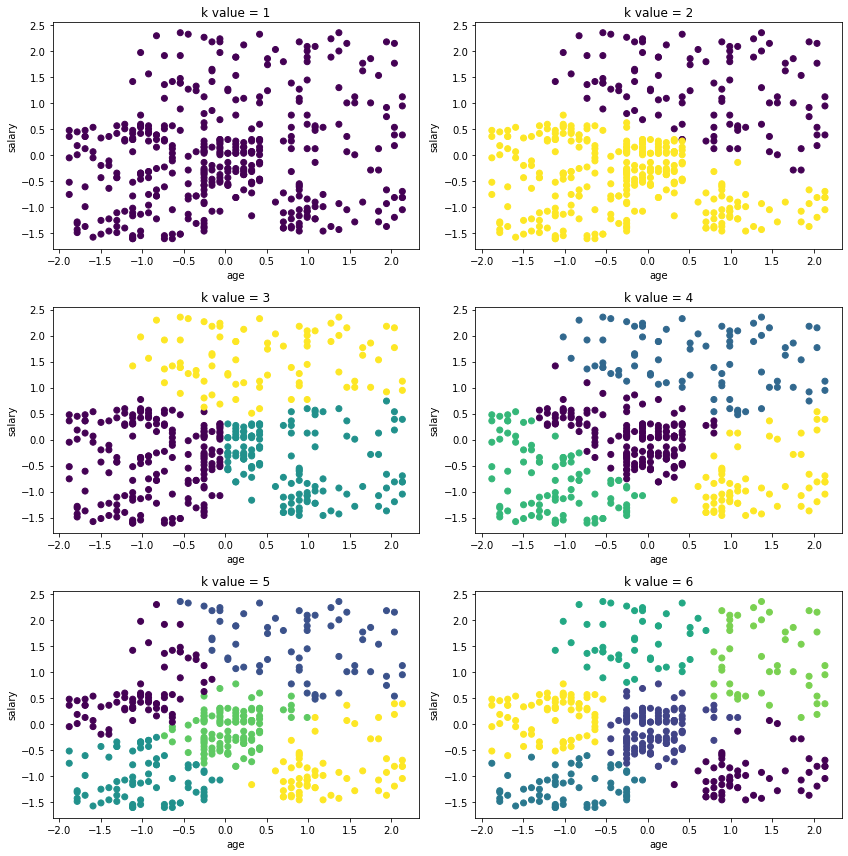

In [76]:
from sklearn.cluster import KMeans

plt.figure(figsize=(12, 12))

for k in range(1, 7):
    km = KMeans(n_clusters=k)
    km.fit(x_sc)
    ids = km.predict(x_sc)
    
    plt.subplot(3, 2, k)
    plt.tight_layout()
    
    plt.title(f'k value = {k}')
    plt.xlabel('age')
    plt.ylabel('salary')
    
    plt.scatter(x_sc[:, 0], x_sc[:, 1], c=ids)
plt.show()

In [88]:
# k=2일 때 kmeans
km_2 = KMeans(n_clusters=2)
km_2.fit(x_sc)

km_df_2 = purchase.copy()
ids = km_2.predict(x_sc)
km_df_2['cluster'] = ids

km_df_2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,cluster
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,0


In [89]:
# 정확도 계산
print(sum(km_df_2['Purchased'] == km_df_2['cluster']) / len(km_df_2))

0.8225


In [90]:
# k=6일 때 kmeans
km_6 = KMeans(n_clusters=6)
km_6.fit(x_sc)

km_df_6 = purchase.copy()
ids = km_6.predict(x_sc)
km_df_6['cluster'] = ids

km_df_6.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,cluster
0,15624510,Male,19,19000,0,5
1,15810944,Male,35,20000,0,5
2,15668575,Female,26,43000,0,5
3,15603246,Female,27,57000,0,1
4,15804002,Male,19,76000,0,1


<AxesSubplot:title={'center':'EstimatedSalary'}, xlabel='cluster'>

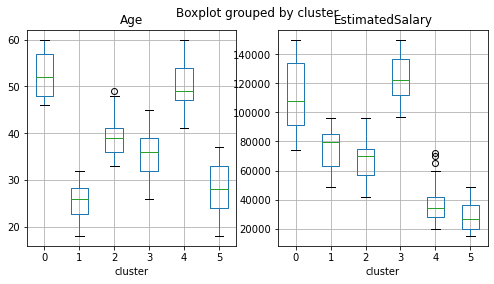

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
km_df_6.boxplot(column = 'Age', by='cluster', ax=ax[0])
km_df_6.boxplot(column = 'EstimatedSalary', by='cluster', ax=ax[1])

In [118]:
# 사람의 나이와 연봉이 - 구매 선택과 관련이 있을지. 데이터분석
for i in range(6):
    n = len(km_df_6.groupby('cluster').get_group(i))
    n_1 = sum(km_df_6.groupby('cluster').get_group(i)['Purchased'] == 1)
    n_0 = sum(km_df_6.groupby('cluster').get_group(i)['Purchased'] == 0)
    print(f'{i} 군집: 총인원={n}, 구매한 사람 수={n_1}, 구매하지 않은 사람 수={n_0}')

0 군집: 총인원=46, 구매한 사람 수=41, 구매하지 않은 사람 수=5
1 군집: 총인원=72, 구매한 사람 수=1, 구매하지 않은 사람 수=71
2 군집: 총인원=119, 구매한 사람 수=15, 구매하지 않은 사람 수=104
3 군집: 총인원=45, 구매한 사람 수=37, 구매하지 않은 사람 수=8
4 군집: 총인원=57, 구매한 사람 수=49, 구매하지 않은 사람 수=8
5 군집: 총인원=61, 구매한 사람 수=0, 구매하지 않은 사람 수=61


(0.0, 277.57960865225056)

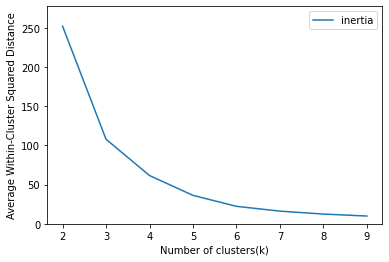

In [120]:
# k 선택 (그림)
inertia = []
for k in range(2, 10):
    km_model = KMeans(n_clusters=k).fit(x_sc)
    inertia.append(km_model.inertia_ / k)
iner_df = pd.DataFrame({'k': range(2,10),
                      'inertia': inertia})

ax = iner_df.plot(x='k', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distance')

plt.ylim((0, iner_df['inertia'].max() * 1.1))

In [137]:
# kmeans 사용하여 예측
# test할 때도, train에서 했던 변형을 똑같이 적용해줘야 함!!
person = [[20, 19000]]
person_sc = sc_purchase.transform(person)
km_2.predict(person_sc)

C:\Users\user\anaconda3\envs\env_temp\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

## Hierarchical Clustering
* agglomerative algorithm: 모든 인스턴스 각각을 하나의 cluster로 두고, cluster 간 dissimilarity를 측정하여 가장 덜 다른 군집끼리 결합하는 알고리즘
* 두 집단 사이의 거리를 구하는 방식
    * complete linkage: 두 집단의 요소가 이룰 수 있는 모든 순서쌍 사이의 거리 중 최대값
    * single linkage: 두 집단의 요소가 이룰 수 있는 모든 순서쌍 사이의 거리 중 최소값
    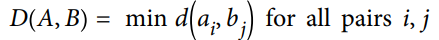
    * average linkage: 두 집단의 요소가 이룰 수 있는 모든 순서쌍 사이의 거리의 평균
    * minimum variance(Wald): 두 집단을 합쳤을 때 within-cluster SS

In [ ]:
# hierarchical clustering 모델 사용 및 시각화

In [122]:
sample = purchase.sample(20)

In [123]:
sample

,User ID,Gender,Age,EstimatedSalary,Purchased
329,15639576,Female,47,107000,1
269,15583137,Male,40,61000,0
214,15622478,Male,47,43000,0
24,15705113,Male,46,23000,1
36,15690188,Female,33,28000,0
394,15757632,Female,39,59000,0
399,15594041,Female,49,36000,1
161,15670619,Male,25,90000,0
298,15675791,Male,45,79000,0
5,15728773,Male,27,58000,0


In [126]:
sample_x = sample[['Age', 'EstimatedSalary']]
sample_x_sc = sc_purchase.transform(sample_x)

In [127]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [128]:
Z = linkage(sample_x_sc)

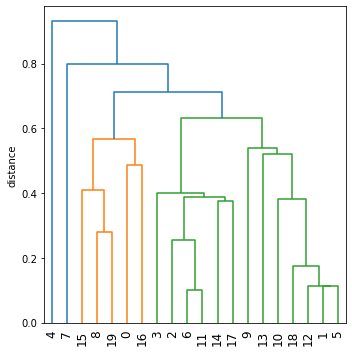

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
dendrogram(Z, labels=range(len(sample_x_sc)),
          show_leaf_counts=True)
plt.xticks(rotation=90)
ax.set_ylabel('distance')
plt.tight_layout()
plt.show()

In [130]:
sample['User ID'] = range(len(sample_x_sc))
sample

,User ID,Gender,Age,EstimatedSalary,Purchased
329,0,Female,47,107000,1
269,1,Male,40,61000,0
214,2,Male,47,43000,0
24,3,Male,46,23000,1
36,4,Female,33,28000,0
394,5,Female,39,59000,0
399,6,Female,49,36000,1
161,7,Male,25,90000,0
298,8,Male,45,79000,0
5,9,Male,27,58000,0


In [131]:
from sklearn.cluster import AgglomerativeClustering

In [132]:
clustering = AgglomerativeClustering().fit(sample_x_sc)
clustering.labels_

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [133]:
sample['cluster'] = clustering.labels_
sample

,User ID,Gender,Age,EstimatedSalary,Purchased,cluster
329,0,Female,47,107000,1,0
269,1,Male,40,61000,0,0
214,2,Male,47,43000,0,1
24,3,Male,46,23000,1,1
36,4,Female,33,28000,0,0
394,5,Female,39,59000,0,0
399,6,Female,49,36000,1,1
161,7,Male,25,90000,0,0
298,8,Male,45,79000,0,0
5,9,Male,27,58000,0,0


In [134]:
print(sum(sample['Purchased'] == sample['cluster']) / len(sample))

0.8
